# Lead Scoring Case Study

### Problem Statement:
Need to help **X Education** (an education company) in increasing their Lead COnversion rate from curretn 30% to a target 80%

### Need to achieve following goals:
 -  Perform EDA to understand various features
 -  Build a Logistic Regression model
 -  Assign Lead score from 0 to 100, to be used by the company to target potential hot leads.
 -  Evaluate the model using metrics like Sensitivity, Specificity, Accuracy etc

### 1. Reading data

In [666]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [667]:
# Importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [668]:
# Importing dataset
lead_data = pd.read_csv(r"C:\Users\USER\Desktop\Lead Scoring Assignment\Leads.csv")

# Displaying all columns
pd.set_option('display.max_columns', None)

lead_data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [669]:
lead_data.shape

(9240, 37)

### 2. Inspecting the data

In [670]:
# checking data types of each feature
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [671]:
# checking ditribution of continous variables
lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


 - looks like we have some outliers in columns Totalvisits and Page Views Per Visit

<AxesSubplot:ylabel='Page Views Per Visit'>

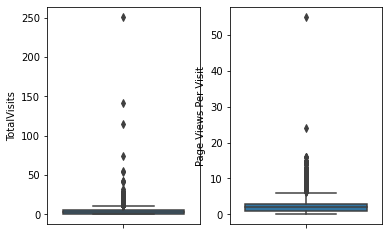

In [672]:
# bar plots for above features to check outliers

fig,ax = plt.subplots(1,2)
sns.boxplot(y = lead_data['TotalVisits'], ax = ax[0])
sns.boxplot(y = lead_data['Page Views Per Visit'], ax = ax[1])

In [673]:
# calculating percentage of outliers > 20
round(100*(len(lead_data[(lead_data['TotalVisits']>20)])/len(lead_data.index)),2)

0.51

In [674]:
# calculating percentage of outliers > 10
round(100*(len(lead_data[(lead_data['Page Views Per Visit']>10)])/len(lead_data.index)),2)

0.54

In [675]:
# Since the percentage of outliers is less than 1% lets drop those records from the data
lead_data = lead_data[~(lead_data['TotalVisits']>20)]
lead_data = lead_data[~(lead_data['Page Views Per Visit']>10)]

<AxesSubplot:ylabel='Page Views Per Visit'>

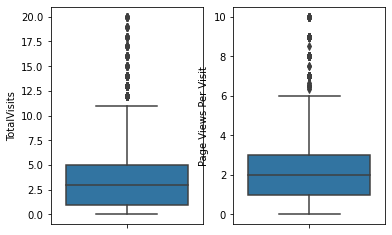

In [676]:
fig,ax = plt.subplots(1,2)
sns.boxplot(y = lead_data['TotalVisits'], ax = ax[0])
sns.boxplot(y = lead_data['Page Views Per Visit'], ax = ax[1])

 - data is looking better now with no huge outliers

### Identified many features which are heavoly biased with one value taking more than 99% of total data

In [677]:
# confirming that the values of NO's for below features are moe than 99% and not relevant to our Model

yes_no_columns = ['Do Not Call','What matters most to you in choosing a course','Search','Magazine',
                            'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                            'I agree to pay the amount through cheque']
for i in yes_no_columns:
    print(i,':',lead_data[i].value_counts()[0])

Do Not Call : 9147
What matters most to you in choosing a course : 6463
Search : 9135
Magazine : 9149
Newspaper Article : 9147
X Education Forums : 9148
Newspaper : 9148
Digital Advertisement : 9145
Through Recommendations : 9142
Receive More Updates About Our Courses : 9149
Update me on Supply Chain Content : 9149
Get updates on DM Content : 9149
I agree to pay the amount through cheque : 9149


### 3. Data Preperation

#### Some key observations found in few YES/No type features
 - in features like 'Do  not Call', 'Search', 'Receive More Updates' etc, NO's have been more than 99% of the data.
 - better to drop these columns as they're not adding any information and hence not useful to our model
 
#### Recommendations to the company
 - could reduce their marketing budget on channels like Magazine, Newspaper, Digital Advetisement etc.
 - can also remove the features while form filling liek 'Do not call', 'update me on Supply chain' etc.

In [678]:
# dropping unnecesary columns from dataframe

lead_data = lead_data.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine',
                            'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                            'I agree to pay the amount through cheque'], axis = 1)

**converting some binary variables (YES/NO) kind to (1/0)**

In [679]:
# binary variables are 'Do Not Email', 'A free copy of Mastering The Interview'

lead_data['Do Not Email'] = lead_data['Do Not Email'].apply(lambda x: '1' if x == 'Yes' else '0').astype('int64')
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].apply(lambda x: '1' if x == 'Yes' else '0').astype('int64')

# also converted the datatype from object to 'int64'

 - we have identified few columns with value 'Select' which has no meaning. 
 - Lets replace it with NULL

In [680]:
# checking columns which have value 'Select'
for i in lead_data.columns:
    if 'Select' in lead_data[i].values:
        lst = lst +[i]
lst

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 

In [681]:
# Replacing 'Select' with NULL
lead_data = lead_data.replace('Select', np.nan)

In [682]:
# checking for null value count now
lead_data.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3366
How did you hear about X Education        7179
What is your current occupation           2665
Tags                                      3322
Lead Quality                              4725
Lead Profile                              6789
City                                      3655
Asymmetrique Activity Index               4183
Asymmetrique Profile Index                4183
Asymmetrique Activity Score               4183
Asymmetrique 

#### We can observe that few columns have too many missing values accounting to more than 25% of data
- after imputing 'Select' with NULL we have few features with 25% to 50% missing data.
- lets drop them as they wont be very helpful in our Model

In [683]:
# dropiing feature with moe than 25% of missing values
lead_data = lead_data.drop(['Country','Specialization','How did you hear about X Education','What is your current occupation',
                           'Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                          'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)
lead_data.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [684]:
# checking null value rows in dataframe
lead_data[lead_data.TotalVisits.isna()].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,0,1,NaN,1096,NaN,NaN,0,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,0,1,NaN,705,NaN,NaN,0,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,0,1,NaN,346,NaN,NaN,0,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,0,1,NaN,1007,NaN,NaN,0,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,0,1,NaN,1111,NaN,NaN,0,Modified


 - looks like columns 'TotalVisits','Page Views Per Visit','Last Activity' all have nulls in common
 - so lest remove these rows to make our data much cleaner

In [685]:
# removing rows which have nulls in multiple columns
lead_data = lead_data[~lead_data.TotalVisits.isna()]

In [686]:
lead_data = lead_data[~lead_data['Lead Source'].isna()]
# delat with all null values

In [687]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [688]:
# in column 'Lead Origin' categories 'Lead Add Form' and 'Lead Import' both are same. 
# merging those by replacing th name of 'Lead Import' with 'Lead add Form'
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace('Lead Import','Lead Add Form')

### Checking for spelling mistakes and merging similar categories for below features
1. Lead Source
2. Last Activity


In [689]:
lead_data['Lead Source'].value_counts()

Google               2848
Direct Traffic       2520
Olark Chat           1752
Organic Search       1116
Reference             442
Welingak Website      129
Referral Sites        118
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [690]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Facebook','Social Media')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('welearnblog_Home','WeLearn')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('NC_EDM','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Press_Release','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('testone','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('bing','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('youtubechannel','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('blog','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Pay per Click Ads','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Live Chat','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Click2call','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('Click2call','Other_Lead_Source')
lead_data['Lead Source'] = lead_data['Lead Source'].replace('WeLearn','Other_Lead_Source')


In [691]:
lead_data['Last Activity'].value_counts()

Email Opened                    3402
SMS Sent                        2695
Olark Chat Conversation          967
Page Visited on Website          613
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               265
Form Submitted on Website        115
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          25
View in browser link Clicked       5
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [692]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace('Resubscribed to emails','Other_Activity')
lead_data['Last Activity'] = lead_data['Last Activity'].replace('Visited Booth in Tradeshow','Other_Activity')
lead_data['Last Activity'] = lead_data['Last Activity'].replace('Email Marked Spam','Other_Activity')
lead_data['Last Activity'] = lead_data['Last Activity'].replace('Email Received','Other_Activity')
lead_data['Last Activity'] = lead_data['Last Activity'].replace('Approached upfront','Other_Activity')
lead_data['Last Activity'] = lead_data['Last Activity'].replace('View in browser link Clicked','Other_Activity')


#### Features 'Last Activity' and 'last Notable Activity' looks pretty correlated
 - also we can see 'Modified' category has replaced many categorical values in "Last Notable Activity"
 - lets keep 'Last Activity' and drop 'last Notable Activity'

In [693]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [694]:
lead_data = lead_data.drop(['Last Notable Activity'], axis = 1)

### 3. Creating Dummy Features

In [695]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [696]:
lead_data.shape

(8983, 32)

**Dropping the repeated variables**

In [697]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity'], 1)

In [698]:
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4. Test-Train Split

In [699]:
from sklearn.model_selection import train_test_split

In [700]:
# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [701]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [702]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [703]:
from sklearn.preprocessing import StandardScaler

In [704]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
7600,0,1.866287,-0.681769,-0.036322,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
698,0,2.190787,-0.526009,0.517173,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1706,0,0.568288,-0.313442,1.373041,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2195,0,1.217288,-0.760565,2.398033,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7000,0,-1.054212,-0.888838,-1.189438,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 6. Let's Look at Correlations

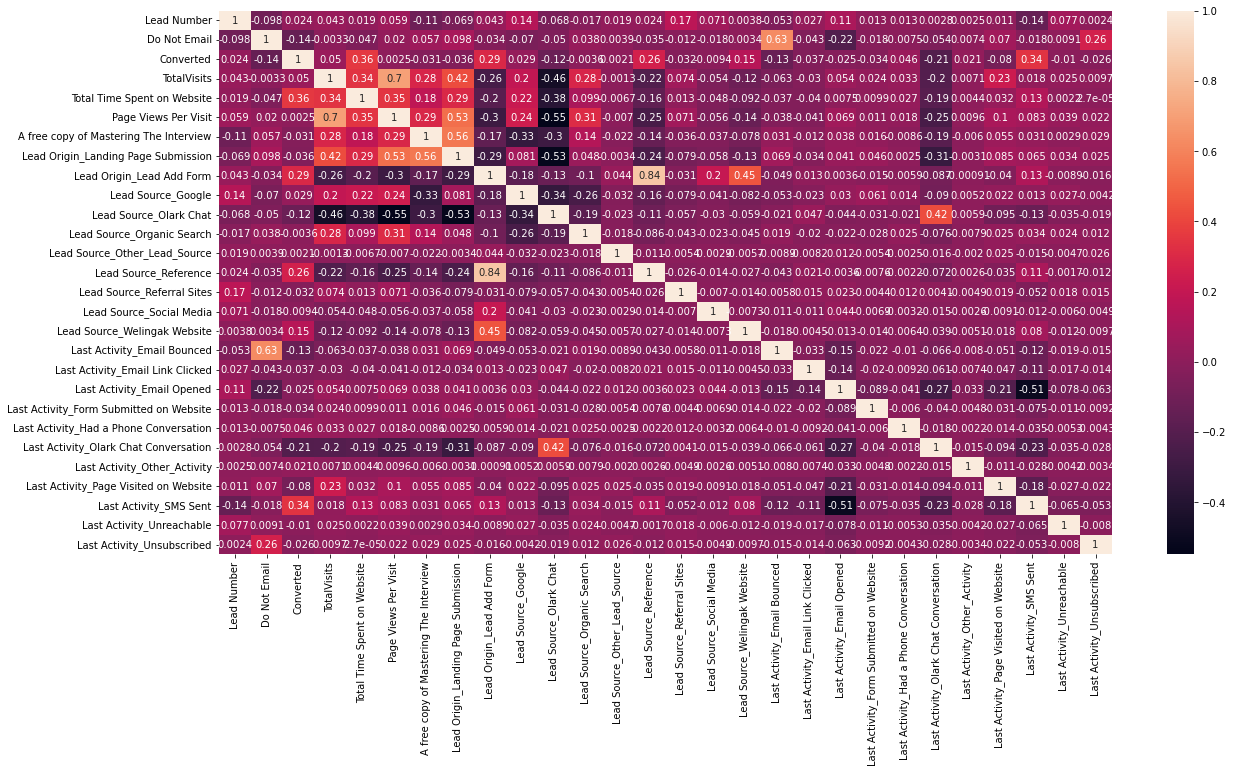

In [705]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

In [706]:
# High correlation trend found woth Feature 'Lead Origin_Lead Add Form'. Dropping this.

X_test = X_test.drop(['Lead Origin_Lead Add Form', 'Page Views Per Visit'], 1)
X_train = X_train.drop(['Lead Origin_Lead Add Form','Page Views Per Visit'], 1)

In [707]:
# scaling the variables again after dropping 'Page Views Per Visit'

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
7600,0,1.866287,-0.681769,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
698,0,2.190787,-0.526009,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1706,0,0.568288,-0.313442,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2195,0,1.217288,-0.760565,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7000,0,-1.054212,-0.888838,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


 **- Lets see the correlation matrix after dropping**

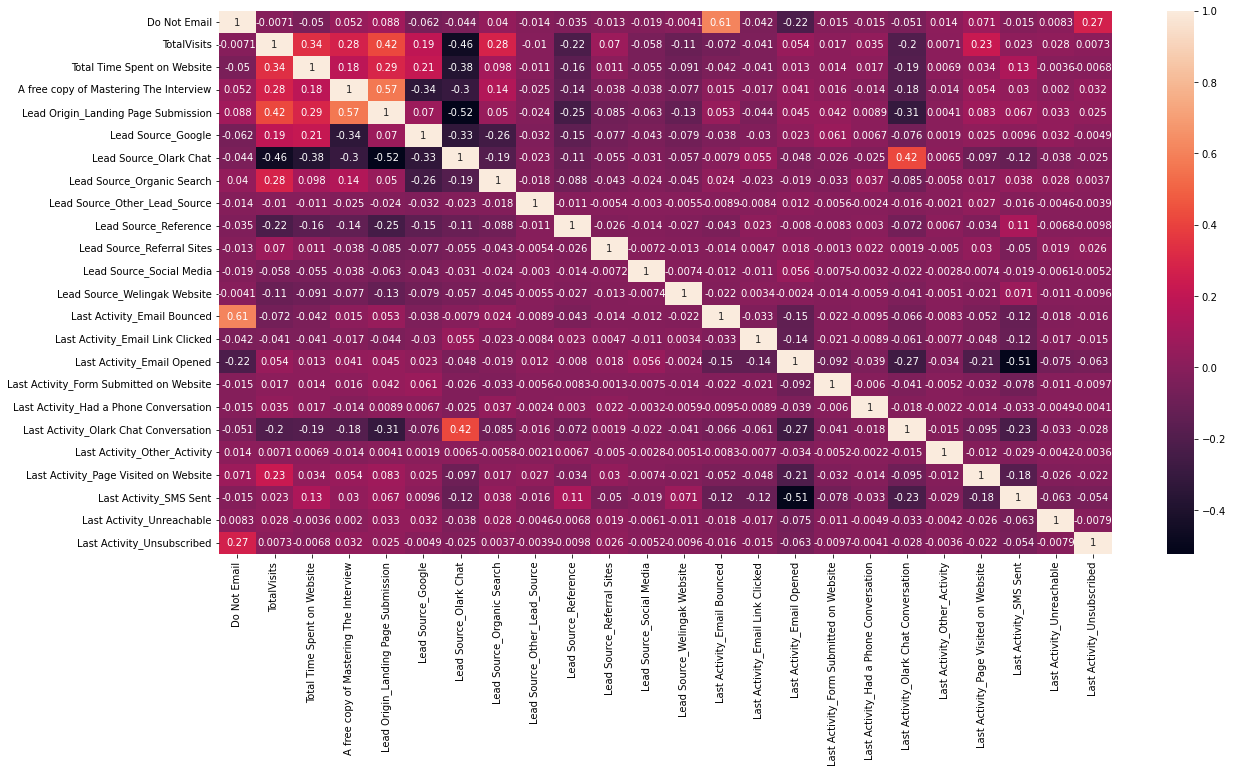

In [708]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
 - lets start with feature selection using RFE method
 - then assigning the model using stats model


In [709]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [710]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 15)             
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [711]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other_Lead_Source', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True

In [712]:
# selecting features that are selected by RFE into col
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Other_Lead_Source', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed'],
      dtype='object')

**Assessing using StatsModels - LOGISTIC REGRESSION**

In [713]:
import statsmodels.api as sm


In [714]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.0
Date:                Wed, 22 Feb 2023   Deviance:                       5699.9
Time:                        16:25:23   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9476      0.104    -18.729      0.000      -2.151      -1.744
Do Not Email                              -1.3910      0.178     -7.834      0.000      -1.739      -1.043
Total Time Spent on Website                1.1274      0.039     29.094      0.000       1.051       1.203
Lead Source_Olark Chat                     1.1420      0.099     11.496      0.000       0.947       1.337
Lead Source_Other_Lead_Source              1.1816      0.590      2.001      0.045       0.024       2.339
Lead Source_Reference                      4.1726      0.230     18.172      0.000       3.723       4.623
Lead Source_Social Media                   1.3271      0.433      3.066      0.002       0.479       2.175
Lead Source_Welingak Website               5.3877      0.722      7.458      0.000       3.972       6.804
Last Activity_Email Link Clicked           0.4600      0.214      2.147      0.032       0.040       0.880
Last Activity_Email Opened                 0.8547      0.113      7.551      0.000       0.633       1.077
Last Activity_Had a Phone Conversation     3.2222      0.698      4.615      0.000       1.854       4.590
Last Activity_Olark Chat Conversation     -0.7297      0.183     -3.991      0.000      -1.088      -0.371
Last Activity_Other_Activity               2.2385      0.689      3.248      0.001       0.888       3.589
Last Activity_SMS Sent                     2.0376      0.115     17.726      0.000       1.812       2.263
Last Activity_Unreachable                  0.8060      0.351      2.296      0.022       0.118       1.494
Last Activity_Unsubscribed                 1.6394      0.480      3.414      0.001       0.698       2.581
==========================================================================================================
"""

- p-values look good so far
- **lets check VIF's too**

In [715]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [716]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.79
10,Last Activity_Olark Chat Conversation,1.39
1,Total Time Spent on Website,1.29
12,Last Activity_SMS Sent,1.21
4,Lead Source_Reference,1.16
8,Last Activity_Email Opened,1.16
0,Do Not Email,1.12
14,Last Activity_Unsubscribed,1.09
6,Lead Source_Welingak Website,1.05
7,Last Activity_Email Link Clicked,1.03


- VIF's looking good too (VIF <3)

In [717]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

7600    0.134530
698     0.156319
1706    0.190583
2195    0.602789
7000    0.073283
          ...   
377     0.605938
84      0.353722
8285    0.320617
7147    0.148318
5810    0.888709
Length: 6288, dtype: float64

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [718]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.134530,7600
1,0,0.156319,698
2,0,0.190583,1706
3,1,0.602789,2195
4,0,0.073283,7000


### 9. Plotting the ROC Curve 

In [719]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [720]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

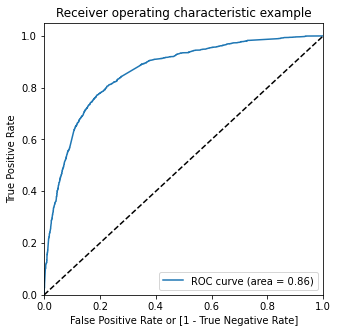

In [721]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Above ROC curve demonstrates following things:

- It shows good tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The curve follows the left-hand border and then the top border of the ROC space - hence good model.


### 10. Finding Optimal Cutoff Point

In [722]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134530,7600,1,1,0,0,0,0,0,0,0,0
1,0,0.156319,698,1,1,0,0,0,0,0,0,0,0
2,0,0.190583,1706,1,1,0,0,0,0,0,0,0,0
3,1,0.602789,2195,1,1,1,1,1,1,1,0,0,0
4,0,0.073283,7000,1,0,0,0,0,0,0,0,0,0


In [723]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381679  1.000000  0.000000
0.1   0.1  0.570452  0.973333  0.321759
0.2   0.2  0.705471  0.913333  0.577160
0.3   0.3  0.773219  0.829167  0.738683
0.4   0.4  0.797233  0.753333  0.824331
0.5   0.5  0.797869  0.671667  0.875772
0.6   0.6  0.774650  0.541667  0.918467
0.7   0.7  0.753976  0.447083  0.943416
0.8   0.8  0.724555  0.332083  0.966821
0.9   0.9  0.672392  0.159583  0.988940


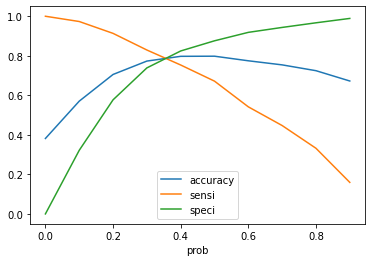

In [724]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [725]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.134530,7600,1,1,0,0,0,0,0,0,0,0,0
1,0,0.156319,698,1,1,0,0,0,0,0,0,0,0,0
2,0,0.190583,1706,1,1,0,0,0,0,0,0,0,0,0
3,1,0.602789,2195,1,1,1,1,1,1,1,0,0,0,1
4,0,0.073283,7000,1,0,0,0,0,0,0,0,0,0,0


In [726]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7732188295165394

#### Lets also create a confusion metrics and check the other metrics

In [727]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2872, 1016],
       [ 410, 1990]], dtype=int64)

In [728]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [729]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291666666666667

In [730]:
# Let us calculate specificity
TN / float(TN+FP)

0.7386831275720165

### Precision and recall tradeoff

In [731]:
from sklearn.metrics import precision_recall_curve

In [732]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6283    1
 6284    1
 6285    0
 6286    0
 6287    0
 Name: Converted, Length: 6288, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6283    1
 6284    1
 6285    1
 6286    0
 6287    1
 Name: final_predicted, Length: 6288, dtype: int64)

In [733]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

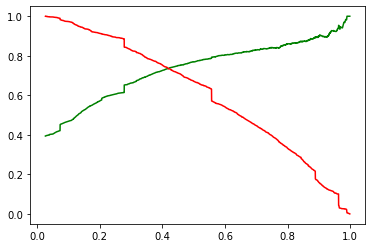

In [734]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- using Recall and Precsion threshhold turned out to be 0.4 which is not very different from our earlier result
- So lets go with the old value of 0.35

### 11. Making predictions on the test set


In [735]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [736]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
7478,0,1.910000e+02,0,0,0,0,0,0,0,0,0,0,1,0,0
1011,0,7.600000e+01,0,0,0,0,0,0,1,0,0,0,0,0,0
6999,0,-6.158489e-17,0,0,0,0,1,0,0,0,0,0,1,0,0
3434,0,7.400000e+01,0,0,0,0,0,0,0,0,0,0,0,0,0
4526,0,1.420000e+02,0,0,0,0,0,0,1,0,0,0,0,0,0


In [737]:
X_test_sm = sm.add_constant(X_test)

#### Lets make predictions on test set now

In [738]:
y_test_pred = res.predict(X_test_sm)

In [739]:
y_test_pred

7478    1.000000
1011    1.000000
6999    0.995839
3434    1.000000
4526    1.000000
          ...   
987     1.000000
1477    1.000000
110     1.000000
4624    0.774178
5219    1.000000
Length: 2695, dtype: float64

In [741]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
7478,1.000000
1011,1.000000
6999,0.995839
3434,1.000000
4526,1.000000
...,...
987,1.000000
1477,1.000000
110,1.000000
4624,0.774178


In [742]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [743]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [744]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [745]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [746]:
y_pred_final.head()

,Converted,CustID,0
0,0,7478,1.000000
1,0,1011,1.000000
2,1,6999,0.995839
3,0,3434,1.000000
4,0,4526,1.000000


In [747]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [751]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Converted','Converted_Prob']]
y_pred_final

,CustID,Converted,Converted_Prob
0,7478,0,1.000000
1,1011,0,1.000000
2,6999,1,0.995839
3,3434,0,1.000000
4,4526,0,1.000000
...,...,...,...
2690,987,0,1.000000
2691,1477,0,1.000000
2692,110,1,1.000000
2693,4624,1,0.774178


In [753]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [756]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,7478,0,1.000000,1
1,1011,0,1.000000,1
2,6999,1,0.995839,1
3,3434,0,1.000000,1
4,4526,0,1.000000,1


In [758]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.44712430426716143

In [760]:
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[2872, 1016],
       [ 410, 1990]], dtype=int64)

In [762]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [763]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291666666666667

In [764]:
# Let us calculate specificity
TN / float(TN+FP)

0.7386831275720165

In [765]:
# Calculate false postive rate - predicting conversion when lead has not have converted
FP/ float(TN+FP)

0.2613168724279835